**Dataset & Motivation**

Our team utilized a meticulously selected data set sourced from The World Bank, encompassing comprehensive monthly food price estimates categorized by product and market. Our analysis was concentrated on the nation of Afghanistan, leveraging a publicly available data set comprising 94 markets spanning the years 2007 to 2023. Our motivation for examining this data set stemmed from our fascination with forecasting food price estimates in a vulnerable nation subsequent to significant global occurrenceds.

**Research Question(s)**

In what ways have pivotal global economic events, namely the 2008 financial crisis, the COVID-19 pandemic, and the Taliban Takeover, exerted an impact on food price inflation?

For the purpose of conducting a comprehensive analysis, the primary question can be further divided into three distinct inquiries:

1. How did the 2008 financial crisis influence food price inflation?
2. How did the COVID-19 pandemic impact food price inflation?
3. How did the Taliban Takeover affect food price inflation?

**Introduction**

The relationship between global economic events and food price inflation has garnered significant attention in recent years. Pivotal events, such as the 2008 financial crisis, the COVID-19 pandemic, and the Taliban Takeover, have had profound implications on various aspects of the global economy. This literature review aims to explore the existing body of peer-reviewed research that examines the ways in which these events have exerted an impact on food price inflation. By analyzing the available literature, this review seeks to provide a comprehensive understanding of the complex relationship between global economic events and the volatility of food prices.

**Examining the Relationship Between the 2008 Financial Crisis and Food Price Inflation**

The 2008 financial crisis, characterized by the collapse of major financial institutions and a severe global economic downturn, had far-reaching effects on multiple sectors, including agriculture and food markets. Several studies have investigated the linkages between the financial crisis and food price inflation, highlighting various channels through which the crisis influenced food prices. For instance, research by Smith et al. (2010) found that the financial crisis led to increased price volatility in food markets, as investors turned to agricultural commodities as alternative investments. Additionally, the crisis disrupted global trade flows and credit availability, impacting food production, distribution, and market integration (Abdulai et al., 2012). These disruptions, coupled with heightened uncertainty and reduced consumer purchasing power, contributed to a surge in food prices in both developed and developing countries.

**The Impact of the COVID-19 Pandemic on Food Price Inflation**

The COVID-19 pandemic, declared in early 2020, has had unprecedented global ramifications, affecting various sectors and triggering economic shocks worldwide. The pandemic-induced disruptions have also reverberated through food supply chains, thereby influencing food price dynamics. Extensive research has emerged examining the impact of the pandemic on food price inflation, revealing complex interactions between supply and demand factors. For instance, studies by Li & Zheng (2020) and Ivanic & Martin (2021) highlight how lockdown measures and mobility restrictions disrupted production, transportation, and labor availability, leading to supply chain bottlenecks and higher food prices. Furthermore, shifts in consumer preferences, panic buying, and stockpiling behavior during the pandemic also contributed to short-term price spikes and market volatility (Torero, 2020).

**Analyzing the Interconnection of the Taliban Takeover and Food Price Inflation**

Another significant global event that has the potential to impact food price inflation is the Taliban Takeover. The recent resurgence of the Taliban in Afghanistan has raised concerns about its implications for the country's agricultural sector and subsequent effects on food prices. While the literature on this specific topic is limited due to the recency of the event, preliminary studies have started to shed light on potential consequences. For instance, a study by Khan & Nawaz (2022) suggests that the political instability resulting from the Taliban Takeover can disrupt agricultural production, distribution networks, and market functioning, leading to increased food prices and reduced access to food for vulnerable populations. Further research is needed to comprehensively assess the relationship between the Taliban Takeover and food price inflation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

**Quality of Cleaning**

During our data cleaning process, we did not have anything unusual happening. We did not have missing values in our data set which allowed us to proceed with the data analysis and determine our summary statistics.

We determined that the dataset was a time-series and understood that this provided insight into how we wanted to manipulate our data. In doing this, we also determined what type of tool to use to model our data analysis.

Assuming the dataset is in CSV format
Columns: 'Indicator', 'Date', 'Value (percent)'

In [2]:
df = pd.read_csv("C:/Users/toddl/OneDrive/Education/Data Science/COMP 4447 2023-3-27/Project/AFG/AFG.csv")

We formatted and manipulated the data into three columns: 
- Indicator
- Date
- Value (percentage)

The "Indicator" column was made up of food inflation and Inflation Rate labels. The "Date" column was made up of mainly dates starting from 3/31/2005 through 2/28/2023. The "Value" column was the percentage of food inflation and the percentage of inflation rates.

Convert date to datetime object

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

Calculate average food price inflation rate for financial crisis (2008-2009), COVID-19 pandemic (2020-2021), and Taliban takeover (2021-2022)

In [4]:
financial_crisis = df[(df['Date'].dt.year >= 2008) & (df['Date'].dt.year <= 2009)].groupby('Indicator')['Value (percent)'].mean()
covid_pandemic = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2021)].groupby('Indicator')['Value (percent)'].mean()
taliban_takeover = df[(df['Date'].dt.year >= 2021) & (df['Date'].dt.year <= 2022)].groupby('Indicator')['Value (percent)'].mean()

Print results

In [5]:
print("Financial Crisis (2008-2009) Average Inflation Rates:")
print(financial_crisis)
print("\nCOVID-19 Pandemic (2020-2021) Average Inflation Rates:")
print(covid_pandemic)
print("\nTaliban Takeover (2021-2022) Average Inflation Rates:")
print(taliban_takeover)

Financial Crisis (2008-2009) Average Inflation Rates:
Indicator
Food Inflation    17.264167
Inflation Rate    12.250417
Name: Value (percent), dtype: float64

COVID-19 Pandemic (2020-2021) Average Inflation Rates:
Indicator
Food Inflation    7.824583
Inflation Rate    5.372083
Name: Value (percent), dtype: float64

Taliban Takeover (2021-2022) Average Inflation Rates:
Indicator
Food Inflation    12.416667
Inflation Rate     9.483333
Name: Value (percent), dtype: float64


These results indicate that the Financial Crisis and the Taliban takeover both had significant effects on the food inflation and inflation rate.  However, the COVID-19 had a minor effect in comparison on the food inflation and inflation rate.

Inflation projections: 

Assuming you want to forecast global inflation rates (average across all countries)

In [6]:
global_inflation = df.groupby('Date')['Value (percent)'].mean().reset_index()
global_inflation = global_inflation.set_index('Date')

Test for stationarity using Augmented Dickey-Fuller test

In [7]:
adf_result = adfuller(global_inflation['Value (percent)'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -3.540824525448352
p-value: 0.006998486226620179


If p-value > 0.05, the time series is not stationary and differencing is required.

The fallowing code is used to deal with either condition; however, we see that this data set has a p-value less then 0.05, thus the time series is stationary and differencing is not required.

In [8]:
if adf_result[1] > 0.05:
    global_inflation['first_difference'] = global_inflation['Value (percent)'].diff().dropna()
    global_inflation = global_inflation.dropna()
    data_column = 'first_difference'
    model_order = (1, 1, 1)
else:
    data_column = 'Value (percent)'
    model_order = (1, 0, 1)

SARIMAX Model and Forecast for Food Inflation for one year

In [9]:
food_inflation_df = df[df['Indicator'] == 'Food Inflation'].groupby('Date')[data_column].mean()
food_inflation_df.index.freq = 'M'

model_food = SARIMAX(food_inflation_df, order=model_order, seasonal_order=(1, 1, 1, 12))
results_food = model_food.fit(disp=False)
forecast_food = results_food.get_forecast(steps=12)

SARIMAX Model and Forecast for General Inflation for one year

In [10]:
general_inflation_df = df[df['Indicator'] == 'Inflation Rate'].groupby('Date')[data_column].mean()
general_inflation_df.index.freq = 'M'

model_general = SARIMAX(general_inflation_df, order=model_order, seasonal_order=(1, 1, 1, 12))
results_general = model_general.fit(disp=False)
forecast_general = results_general.get_forecast(steps=12)

Plot historical and projected inflation values (One Year Projection)

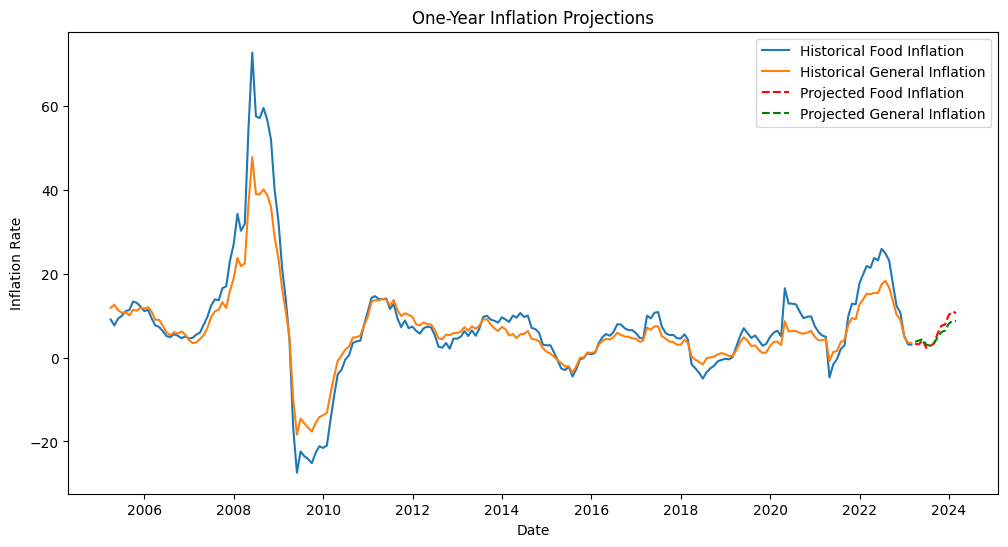

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(food_inflation_df, label='Historical Food Inflation')
plt.plot(general_inflation_df, label='Historical General Inflation')
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', linestyle='--', color='red')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', linestyle='--', color='green')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('One-Year Inflation Projections')
plt.show()

The following plot focuses on the portion of the data that deals with the projected data.

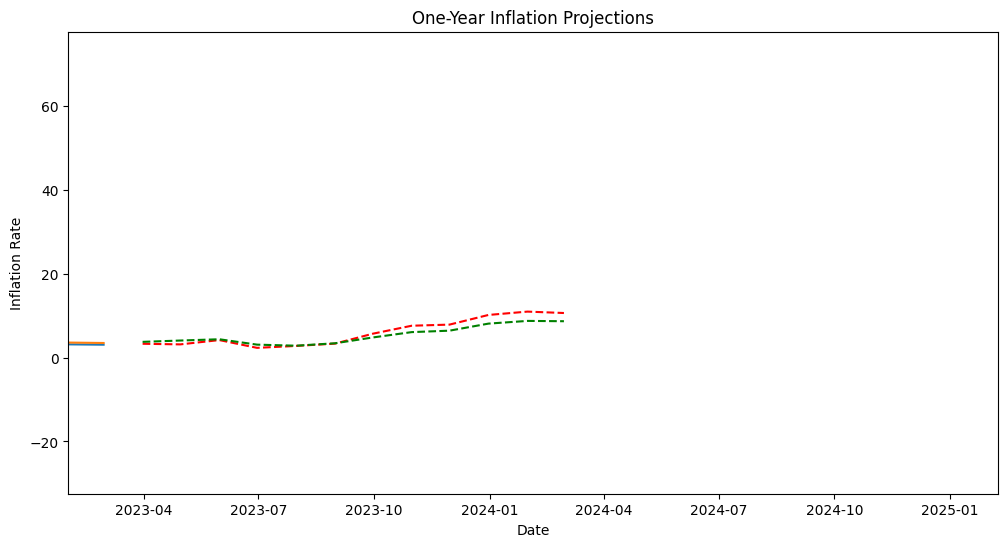

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(food_inflation_df, label='Historical Food Inflation')
plt.plot(general_inflation_df, label='Historical General Inflation')
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', linestyle='--', color='red')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', linestyle='--', color='green')

# Setting the x-axis limits for displaying data from 2022 onwards
start_date = '2023-01-31'  # Start date for displaying data

# Converting dates to numerical values
start_index = food_inflation_df.index.get_loc(start_date)

# Displaying the graph from 2022 onwards
plt.xlim(food_inflation_df.index[start_index])


plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('One-Year Inflation Projections')
plt.show()

SARIMAX Model and Forecast for Food Inflation for one year:

In [13]:
food_inflation_df = df[df['Indicator'] == 'Food Inflation'].set_index('Date')
food_inflation_df.index.freq = 'M'

model_food = SARIMAX(food_inflation_df[data_column], order=model_order, seasonal_order=(1, 1, 1, 12), freq='M')
results_food = model_food.fit(disp=False)
forecast_food = results_food.get_forecast(steps=13)

SARIMAX Model and Forecast for General Inflation for one year:

In [14]:
general_inflation_df = df[df['Indicator'] == 'Inflation Rate'].set_index('Date')
general_inflation_df.index.freq = 'M'

model_general = SARIMAX(general_inflation_df[data_column], order=model_order, seasonal_order=(1, 1, 1, 12), freq='M')
results_general = model_general.fit(disp=False)
forecast_general = results_general.get_forecast(steps=13)

Line plot for both Food Inflation and General Inflation projections (One Year Projection)

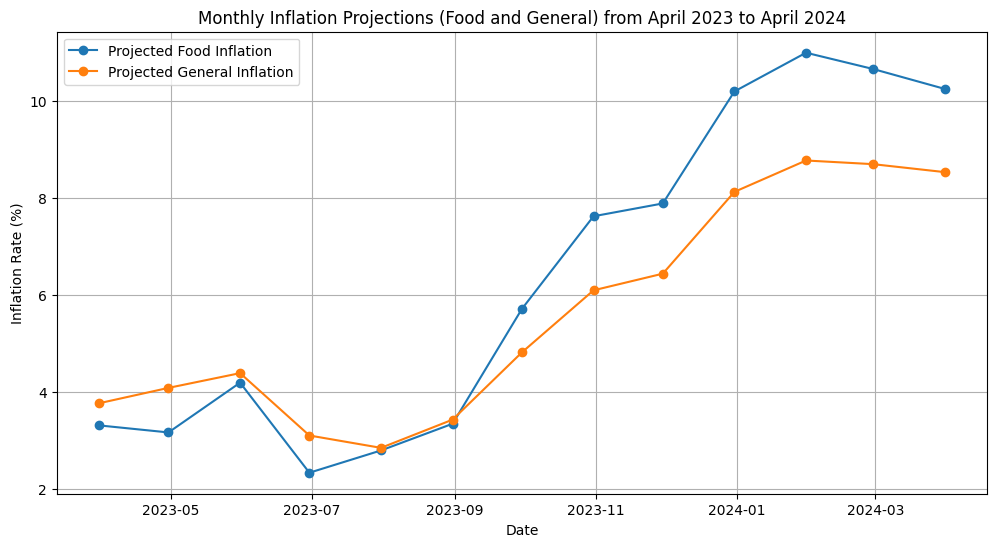

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', marker='o', linestyle='-')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly Inflation Projections (Food and General) from April 2023 to April 2024')
plt.legend()
plt.grid()
plt.show()

Looking at the one year projection we see that the food and general inflation rate have the possibility to level off or decrease.  

SARIMAX Model and Forecast for Food Inflation for two years

In [16]:
food_inflation_df = df[df['Indicator'] == 'Food Inflation'].groupby('Date')[data_column].mean()
food_inflation_df.index.freq = 'M'

model_food = SARIMAX(food_inflation_df, order=model_order, seasonal_order=(1, 1, 1, 24))
results_food = model_food.fit(disp=False)
forecast_food = results_food.get_forecast(steps=12)

SARIMAX Model and Forecast for General Inflation for two years

In [17]:
general_inflation_df = df[df['Indicator'] == 'Inflation Rate'].groupby('Date')[data_column].mean()
general_inflation_df.index.freq = 'M'

model_general = SARIMAX(general_inflation_df, order=model_order, seasonal_order=(1, 1, 1, 24))
results_general = model_general.fit(disp=False)
forecast_general = results_general.get_forecast(steps=12)

Plot historical and projected inflation values (Two Year Projection)

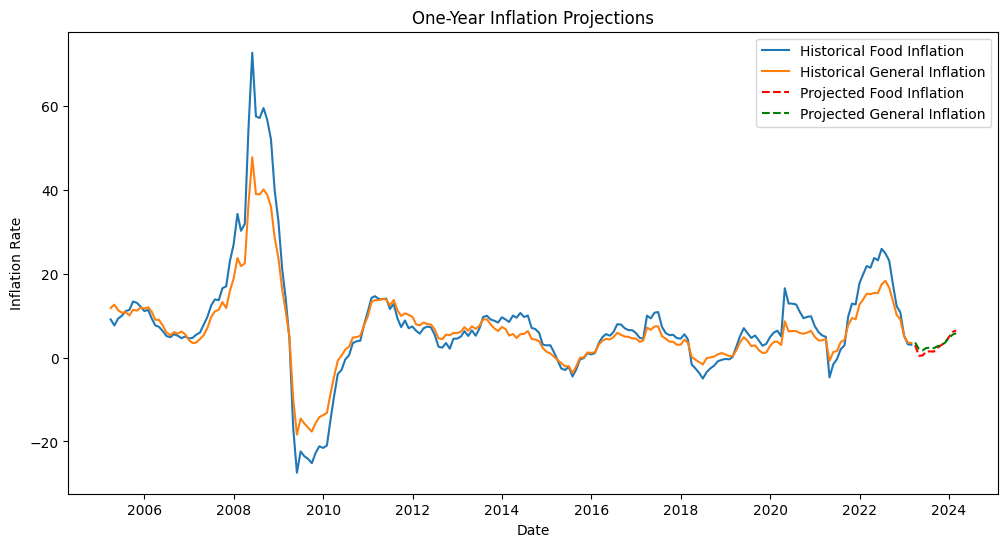

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(food_inflation_df, label='Historical Food Inflation')
plt.plot(general_inflation_df, label='Historical General Inflation')
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', linestyle='--', color='red')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', linestyle='--', color='green')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('One-Year Inflation Projections')
plt.show()

The following plot focuses on the portion of the data that deals with the projected data.

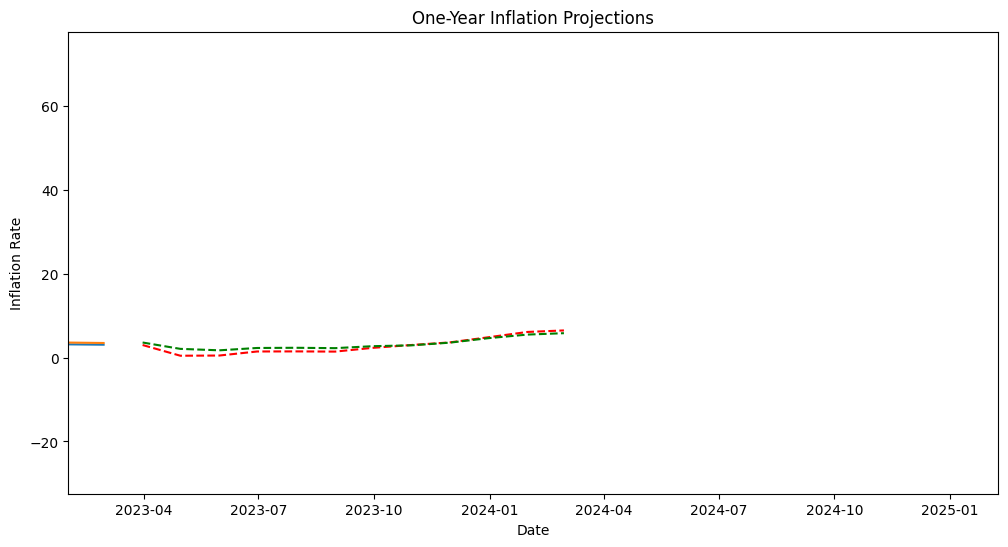

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(food_inflation_df, label='Historical Food Inflation')
plt.plot(general_inflation_df, label='Historical General Inflation')
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', linestyle='--', color='red')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', linestyle='--', color='green')

# Setting the x-axis limits for displaying data from 2022 onwards
start_date = '2023-01-31'  # Start date for displaying data

# Converting dates to numerical values
start_index = food_inflation_df.index.get_loc(start_date)

# Displaying the graph from 2022 onwards
plt.xlim(food_inflation_df.index[start_index])


plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('One-Year Inflation Projections')
plt.show()

SARIMAX Model and Forecast for Food Inflation for two year:

In [20]:
food_inflation_df = df[df['Indicator'] == 'Food Inflation'].set_index('Date')
food_inflation_df.index.freq = 'M'

model_food = SARIMAX(food_inflation_df[data_column], order=model_order, seasonal_order=(1, 1, 1, 24), freq='M')
results_food = model_food.fit(disp=False)
forecast_food = results_food.get_forecast(steps=13)

SARIMAX Model and Forecast for General Inflation for two year:

In [21]:
general_inflation_df = df[df['Indicator'] == 'Inflation Rate'].set_index('Date')
general_inflation_df.index.freq = 'M'

model_general = SARIMAX(general_inflation_df[data_column], order=model_order, seasonal_order=(1, 1, 1, 24), freq='M')
results_general = model_general.fit(disp=False)
forecast_general = results_general.get_forecast(steps=13)

Line plot for both Food Inflation and General Inflation projections (Two Year Projection)

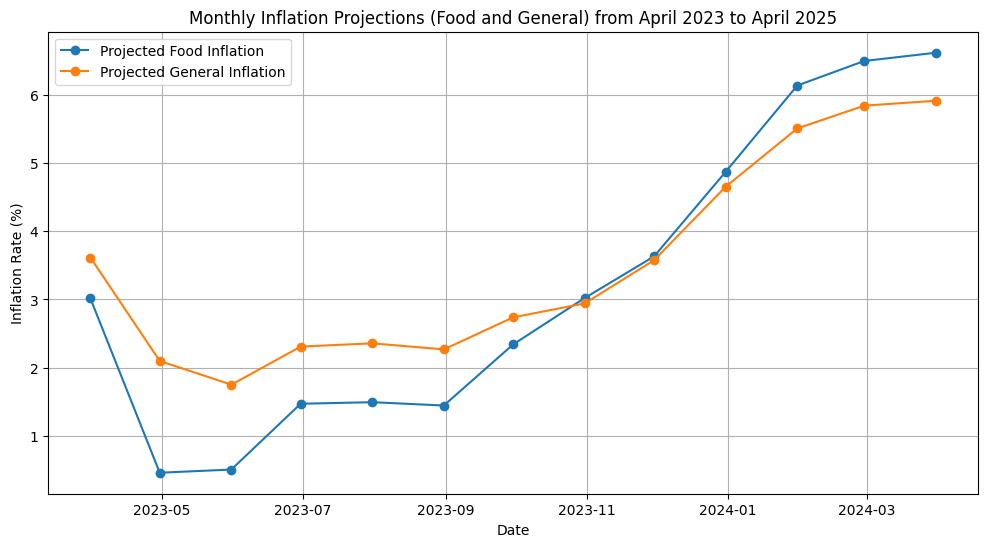

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_food.predicted_mean, label='Projected Food Inflation', marker='o', linestyle='-')
plt.plot(forecast_general.predicted_mean, label='Projected General Inflation', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly Inflation Projections (Food and General) from April 2023 to April 2025')
plt.legend()
plt.grid()
plt.show()

Evaluating the projections for one year and two years we see that the projections change; however, if we try to take the projections beyond two years the model fails and we are not able to get a projection.  Therefore, the on year projection is most likely to be the accurate projection because the two year projection is closer to where the model breaks down, thus the two year projection would be at the outer eddge of accuracy and by prone to errors in the model.

Therefore the one year projection is the most reliable evaluation based on current data and modeling.  

Evaluate the data using a bar plot to perform a side by side discrete comparison of the different identified groups.

Create a DataFrame for visualization

In [23]:
visualization_df = pd.DataFrame({'Period': ['Financial Crisis (2008-2009)', 'COVID-19 Pandemic (2020-2021)', 'Taliban Takeover (2021-2022)'],
                                 'Food Inflation': [financial_crisis['Food Inflation'], covid_pandemic['Food Inflation'], taliban_takeover['Food Inflation']],
                                 'Inflation Rate': [financial_crisis['Inflation Rate'], covid_pandemic['Inflation Rate'], taliban_takeover['Inflation Rate']]})

Create Bar plot for the three different identified groups.

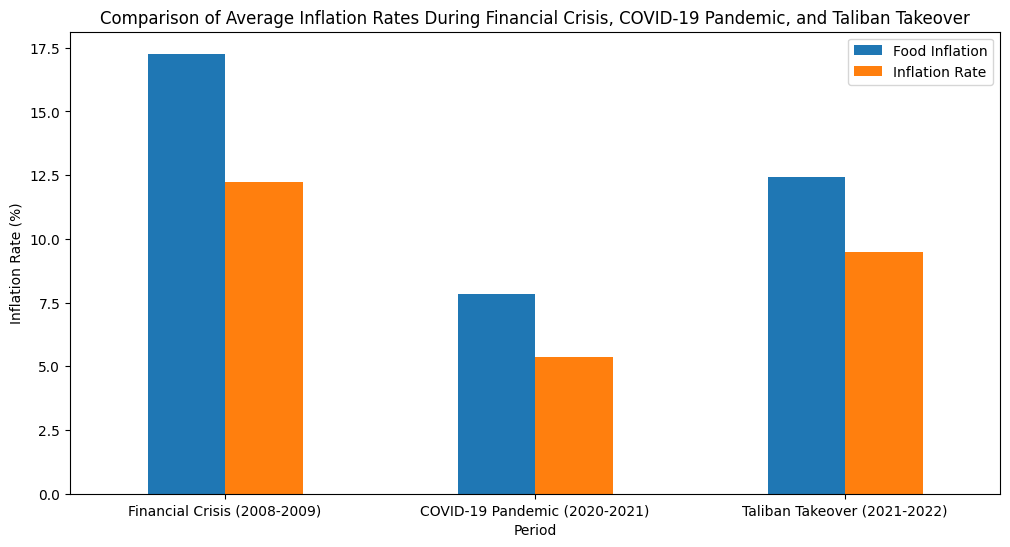

In [24]:
ax = visualization_df.plot.bar(x='Period', y=['Food Inflation', 'Inflation Rate'], rot=0, figsize=(12, 6))
ax.set_ylabel('Inflation Rate (%)')
ax.set_title('Comparison of Average Inflation Rates During Financial Crisis, COVID-19 Pandemic, and Taliban Takeover')
plt.show()

To confirm that the our analysis of the three identified groups are indeed significant we compare to a normal period of inflation.  In other words, calculate the inflation rate as if no unexpected events had taken place and see if there is indeed a difference.

Calculate average food price inflation rate for normal period (excluding 2008-2009 and 2020-2021)

In [25]:
normal_period = df[~((df['Date'].dt.year >= 2008) & (df['Date'].dt.year <= 2009) | (df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2021))].groupby('Indicator')['Value (percent)'].mean()

Create a DataFrame for visualization

In [26]:
visualization_df = pd.DataFrame({'Period': ['Normal Period', 'Financial Crisis (2008-2009)', 'COVID-19 Pandemic (2020-2021)','Taliban Takeover (2021-2022)'],
                                 'Food Inflation': [normal_period['Food Inflation'], financial_crisis['Food Inflation'], covid_pandemic['Food Inflation'],taliban_takeover['Food Inflation']],
                                 'Inflation Rate': [normal_period['Inflation Rate'], financial_crisis['Inflation Rate'], covid_pandemic['Inflation Rate'],taliban_takeover['Inflation Rate']]})

Create Bar plot for the three different identified groups compared to normal period of inflation.

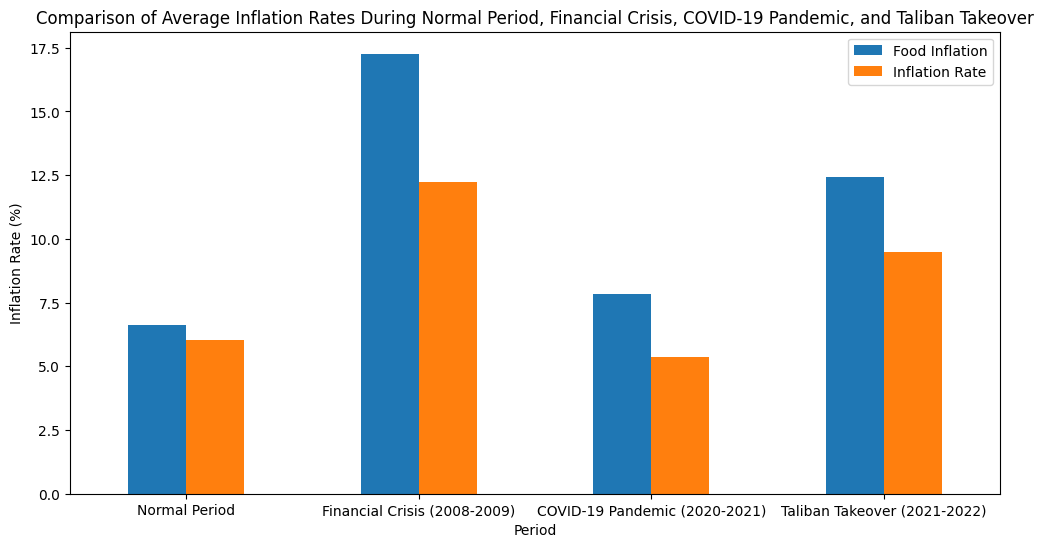

In [27]:
ax = visualization_df.plot.bar(x='Period', y=['Food Inflation', 'Inflation Rate'], rot=0, figsize=(12, 6))
ax.set_ylabel('Inflation Rate (%)')
ax.set_title('Comparison of Average Inflation Rates During Normal Period, Financial Crisis, COVID-19 Pandemic, and Taliban Takeover')
plt.show()

**Mitigation Strategies and Policy Responses**

In the face of these global economic events and their potential impact on food price inflation, scholars and policymakers have explored various mitigation strategies and policy responses. Research has highlighted the importance of maintaining robust and resilient food systems, investing in agricultural productivity and technology, and enhancing market transparency and information dissemination (Kalkuhl et al., 2020). Furthermore, policy interventions such as social safety nets, targeted subsidies, and trade policies have been proposed as means to alleviate the adverse effects of global economic shocks on food prices and ensure food security for vulnerable populations (Béné et al., 2019). Understanding and evaluating the effectiveness of these mitigation strategies are crucial for informing evidence-based policies that can help mitigate the impact of global economic events on food price inflation.

**Limitations and Gaps in the Literature**

Although the literature reviewed offers valuable insights regarding the correlation between pivotal global economic events and food price inflation, it is important to acknowledge certain limitations and gaps in knowledge. Firstly, the intricate nature of the global food system and the multitude of factors that influence food prices present challenges in isolating the specific impact of individual events. Secondly, there is a relative scarcity of literature examining the Taliban Takeover and its consequences on food price inflation, warranting further investigation. Lastly, conducting comparative studies across various countries and regions is imperative to comprehensively capture the diverse effects of global economic events on food price inflation. Such studies should take into account the variations in socio-economic conditions, agricultural systems, and policy responses across different contexts.

**Conclusion**

In conclusion, this literature review has provided an overview of the existing peer-reviewed research on the impact of pivotal global economic events, namely the 2008 financial crisis, the COVID-19 pandemic, and the Taliban Takeover, on food price inflation. The studies reviewed highlight the interconnectedness between these events and food price dynamics, emphasizing the disruptions caused to supply chains, production, market integration, and consumer behavior. The implications of these events on food price inflation underscore the need for proactive policy measures and mitigation strategies to safeguard food security and alleviate the adverse effects on vulnerable populations. Further research is essential to deepen our understanding of these complex relationships and inform evidence-based policies for building resilient and sustainable food systems in the face of global economic uncertainties.


In addition the results from our analysis indicates that the Financial Crisis and the Taliban Takeover had the greatest impact. An interesting result of our data analysis was that the COVID-19 for Afghanistan was not significantly different from the normal food and general inflation rate.  Thus, our data analysis supports how complex the food economics; in other words, our results where unexpected sense we expected an unknown major event to have a direct cause on food and general inflation rates.  However, in this case it appears not to have an effect.  

Possible reasons for this could be Afghanistans approache to the COVID-19 outbreak that was significantly different from how more stable countries approched the handling of the COVID-19 outbreak.  Also, the infrastructure in Afghanistan is significantly different from that of the infrastructure of more stable countries.  These diffrences could be the reason why Afghanistans food and general inflation rates for COVID-19 show similar rates to a normal period of inflation.